# Speaker Identification Using Machine Learning

## Part I: Recording Audio Sample using Pyaudio

### Record a few seconds of audio and save to a wave file

In [8]:
"""PyAudio Example: Record a few seconds of audio and save to a wave file."""

import wave
import sys
from datetime import datetime

import pyaudio

# Get current time
current_time = datetime.now()
# Format time
current_time = current_time.strftime("%H-%M-%S_%d-%m-%Y")

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1 if sys.platform == 'darwin' else 2
RATE = 44100
RECORD_SECONDS = 5

file_name = 'sample_' + current_time + '.wav'
path = './audio_samples/' + file_name

with wave.open(path, 'wb') as wf:
    p = pyaudio.PyAudio()
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)

    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True)

    print('Recording...')
    for _ in range(0, RATE // CHUNK * RECORD_SECONDS):
        wf.writeframes(stream.read(CHUNK))
    print('Done')

    stream.close()
    p.terminate()

Recording...
Done


### Play a wave file

In [9]:
"""PyAudio Example: Play a wave file."""

import wave
import glob

import pyaudio

CHUNK = 1024
rel_path = './audio_samples/*.wav'
# Create the list of files to determine last file
audio_files = glob.glob(rel_path)

for file_path in audio_files:
    with wave.open(file_path, 'rb') as wf:
        # Instantiate PyAudio and initialize PortAudio system resources (1)
        p = pyaudio.PyAudio()

        # Open stream (2)
        stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                        channels=wf.getnchannels(),
                        rate=wf.getframerate(),
                        output=True)

        # Play samples from the wave file (3)
        while len(data := wf.readframes(CHUNK)):  # Requires Python 3.8+ for :=
            stream.write(data)

        # Close stream (4)
        stream.close()

# Release PortAudio system resources (5)
p.terminate()

## Extracting Features from Audio Samples

In [10]:
import os
import glob
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

# %matplotlib inline

In [22]:
TRAIN_PATH = './audio_samples/audio_train/*.wav'
# Create the list of files to determine last file
audio_files = glob.glob(TRAIN_PATH)
# Create and display a "display" objects
for file in audio_files:
    ipd.display(ipd.Audio(audio_files[0]))

In [30]:
for count, file in enumerate(audio_files):
    print(f'Parameters of audio file no. {count+1}')
    sample_rate, audio = wavfile.read(file)
    print("Sample rate: {0}Hz".format(sample_rate))
    print("Audio duration: {0}s".format(len(audio) / sample_rate))

Parameters of audio file no. 1
Sample rate: 44100Hz
Audio duration: 4.992290249433107s
Parameters of audio file no. 2
Sample rate: 44100Hz
Audio duration: 4.992290249433107s


In [32]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

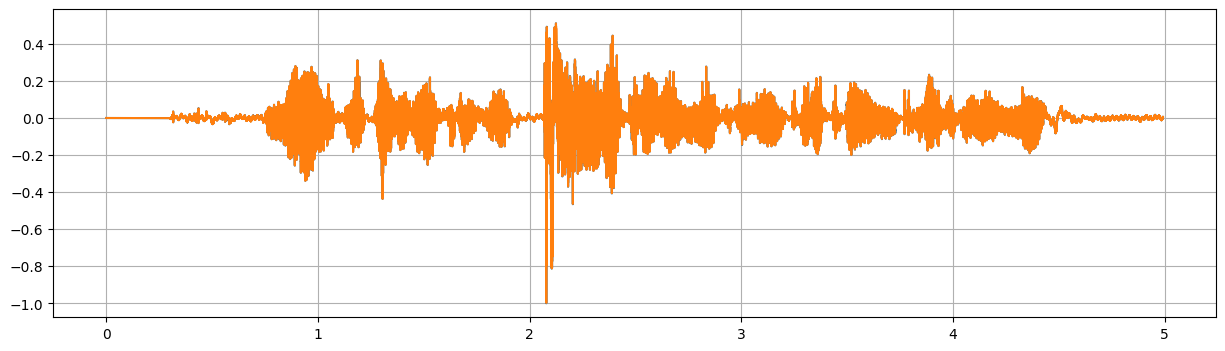

In [33]:
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)